<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Tarea Semanal Nº6
#### Gisela Farace

## Consigna

#### Estimación espectral. Ventaneo de la información. <br>
 
En esta tarea experimentaremos algunos conceptos presentados en el libro de Holton. DSP Principles and App.

1) Implemente las funciones para generar las siguientes ventanas w(k):

* Bartlett ó triangular
* Hann
* Blackman
* Flat-top
Ayuda: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

a) Para cada ventana grafique $w(k)$ y $|W(\Omega)|$, para N = 1000 muestras, normalizando $w(k)$ de forma tal que la amplitud máxima de $|W(\Omega)|$ (lóbulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(\Omega)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del lóbulo principal de cada ventana:

* $Ω_{0}$ será la frecuencia del primer cruce por cero, es decir $|W(\Omega)|=0$ y 
* $Ω_{1}$, aquella frecuencia tal que $|W(\Omega_{1})|=\frac{2}{\sqrt{2}} ∨ −3 dB$ y 
* el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)

<center>$W_{2}=max{|W(\Omega)|},  ∀ \Omega≥\Omega_{0}$</center>


Sugerencia: Normalice $\Omega_{0,1}$ por $\Delta f=\frac{f}{SN}$ para facilitar la comparación.

## Código

#### Importación de librerias

In [25]:
# Importación de módulos para Jupyter

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.signal.windows as wind

# Para la tabla
from pandas import DataFrame
from IPython.display import HTML

#Presentación de los gŕaficos
mpl.rcParams['figure.figsize'] = (17,5)
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

### Ventanas

Text(0, 0.5, 'Amplitud')

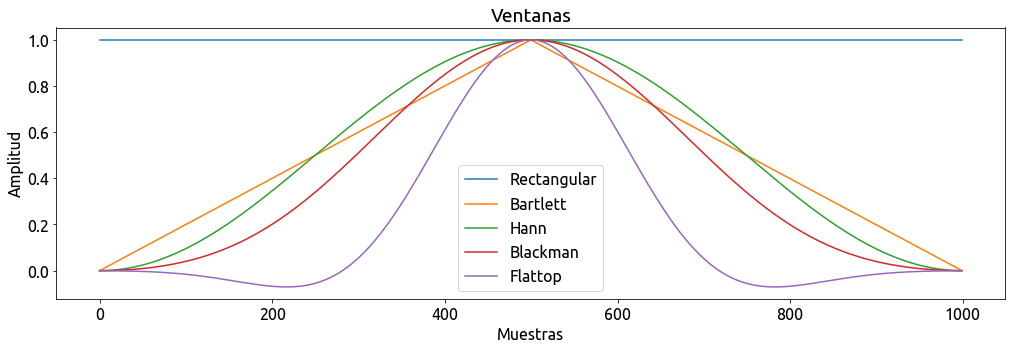

In [26]:
N = 1000
fs = 1000
Npad = 10*N

rec = wind.boxcar(N)
bar = wind.bartlett(N)
han = wind.hann(N)
bm = wind.blackman(N)
ft = wind.flattop(N)

tt = np.linspace(0, (N-1), N)

plt.figure(1)
plt.plot(tt, rec)
plt.plot(tt, bar)
plt.plot(tt, han)
plt.plot(tt, bm)
plt.plot(tt, ft)

plt.title('Ventanas')
plt.legend(['Rectangular','Bartlett','Hann','Blackman','Flattop'])
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

/tmp/ipykernel_72261/2564252401.py:12: RuntimeWarning: divide by zero encountered in log10
  fft_rec_db = 20*np.log10(np.abs(1/Npad*fft_rec[bfrec])/np.abs(1/Npad*fft_rec[0]))
/tmp/ipykernel_72261/2564252401.py:13: RuntimeWarning: divide by zero encountered in log10
  fft_bar_db = 20*np.log10(np.abs(1/Npad*fft_bar[bfrec])/np.abs(1/Npad*fft_bar[0]))


(-150.0, 5.0)

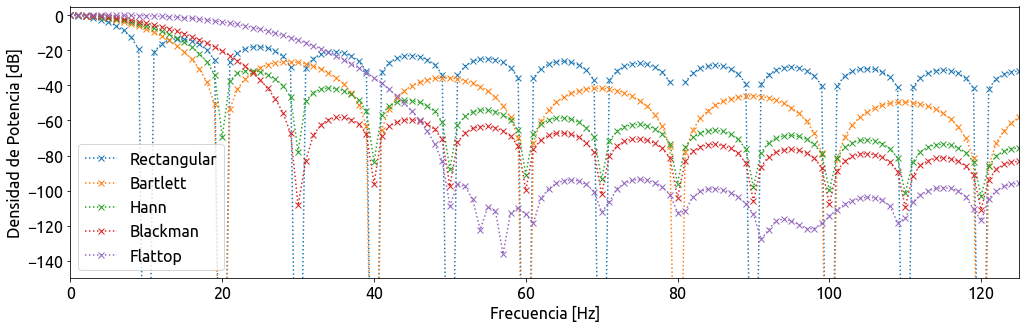

In [27]:
# Calculo la transformada de cada una, normalizando para que estén en 0dB

fft_rec = np.fft.fft(rec, axis=0, n=Npad)
fft_bar = np.fft.fft(bar, axis=0, n=Npad)
fft_han = np.fft.fft(han, axis=0, n=Npad)
fft_bm = np.fft.fft(bm, axis=0, n=Npad)
fft_ft = np.fft.fft(ft, axis=0, n=Npad)

f = np.linspace(0, (Npad-1), Npad)*fs/N
bfrec = f <= fs/2

fft_rec_db = 20*np.log10(np.abs(1/Npad*fft_rec[bfrec])/np.abs(1/Npad*fft_rec[0]))
fft_bar_db = 20*np.log10(np.abs(1/Npad*fft_bar[bfrec])/np.abs(1/Npad*fft_bar[0]))
fft_han_db = 20*np.log10(np.abs(1/Npad*fft_han[bfrec])/np.abs(1/Npad*fft_han[0]))
fft_bm_db = 20*np.log10(np.abs(1/Npad*fft_bm[bfrec])/np.abs(1/Npad*fft_bm[0]))
fft_ft_db = 20*np.log10(np.abs(1/Npad*fft_ft[bfrec])/np.abs(1/Npad*fft_ft[0]))

plt.figure(2)
plt.plot(f[bfrec], fft_rec_db,'x:')  
plt.plot(f[bfrec], fft_bar_db,'x:')  
plt.plot(f[bfrec], fft_han_db,'x:')  
plt.plot(f[bfrec], fft_bm_db,'x:')  
plt.plot(f[bfrec], fft_ft_db,'x:')  

plt.legend(['Rectangular','Bartlett','Hann','Blackman','Flattop'])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlim(0,125)
plt.ylim(-150,5)

### Búsqueda de cruces por cero

In [42]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# Busco las frecuencias de los cruces por cero

def zero_1(fft_ven_db, N, Npad):
    zero1 = 0;
    frec1 = 0;
    for i in range (0,int(N/50)):
        if fft_ven_db[i] < zero1:
            zero1 = fft_ven_db[i]
            frec1 = i
    frec1 = frec1*fs/Npad  
    return frec1;

def zero_2(fft_ven_db, Npad):
    # np.where out: ndarray An array with elements from x where condition is True, and elements from y elsewhere
    frec2 = np.where(fft_rec_db == find_nearest(fft_rec_db,-3))[0][0]* fs/Npad
    return frec2

def Wmax(fft_ven_db, N):
    W_max = -N
    for i in range (int(N/5),int(N/2)):
        if fft_ven_db[i] > W_max:
            W_max = fft_ven_db[i] 
    return W_max

fft_vent = [fft_rec_db,fft_bar_db,fft_han_db,fft_bm_db,fft_ft_db]
z1 = [0,0,0,0,0]
z2 = [0,0,0,0,0]
Wm = [0,0,0,0,0]

for i in range(0,5):
    z1[i]= zero_1(fft_vent[i], N, Npad)
    z2[i] = zero_2(fft_vent[i], Npad)
    Wm[i] = Wmax(fft_vent[i], N)

#Tabla

data = [[z1[0], z2[0], Wm[0]],
        [z1[1], z2[1], Wm[1]],
        [z1[2], z2[2], Wm[2]],
        [z1[3], z2[3], Wm[3]],
        [z1[4], z2[4], Wm[4]]]

df = DataFrame(data,columns=['$\Omega_0$', '$\Omega_1$', '$W_2$ [dB]' ],
                index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'])
HTML(df.to_html())


,$\Omega_0$,$\Omega_1$,$W_2$ [dB]
Rectangular,1.0,0.4,-36.172069
Bartlett,1.9,0.4,-60.722490
Hann,1.9,0.4,-88.619460
Blackman,1.9,0.4,-96.091233
Flat-top,1.9,0.4,-93.160145
